In [1]:
import pydicom
import pylab
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

C:\Users\ashwathi.subramanian\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## The patients that have pneumonia have the x,y, width and height values populated, target being 1.
## The patients that do not have pneumonia have the x,y, width and height values populated as NaN, target being 0.

In [3]:
labels = pd.read_csv('C:/Users/ashwathi.subramanian/Downloads/stage_2_train_labels/stage_2_train_labels.csv')
labels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [4]:
print("Shape of the labels dataframe before dropping the duplicates is:",labels.shape)
print("Shape of the labels dataframe after dropping the duplicates is:",labels.drop_duplicates().shape)

Shape of the labels dataframe before dropping the duplicates is: (30227, 6)
Shape of the labels dataframe after dropping the duplicates is: (30227, 6)


In [5]:
labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30227 entries, 0 to 30226
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patientId  30227 non-null  object 
 1   x          9555 non-null   float64
 2   y          9555 non-null   float64
 3   width      9555 non-null   float64
 4   height     9555 non-null   float64
 5   Target     30227 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 1.4+ MB


In [6]:
## Get the unique count of all column values
labels.nunique()

patientId    26684
x              748
y              726
width          351
height         725
Target           2
dtype: int64

In [7]:
## Getting the count of number of nulls present in the labels dataframe
labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

In [8]:
## 5-point summary
labels.describe().T 

,count,mean,std,min,25%,50%,75%,max
x,9555.0,394.047724,204.574172,2.0,207.0,324.0,594.0,835.0
y,9555.0,366.839560,148.940488,2.0,249.0,365.0,478.5,881.0
width,9555.0,218.471376,59.289475,40.0,177.0,217.0,259.0,528.0
height,9555.0,329.269702,157.750755,45.0,203.0,298.0,438.0,942.0
Target,30227.0,0.316108,0.464963,0.0,0.0,0.0,1.0,1.0


Text(0.5, 1.0, 'Pneumonia vs No Pneumonia')

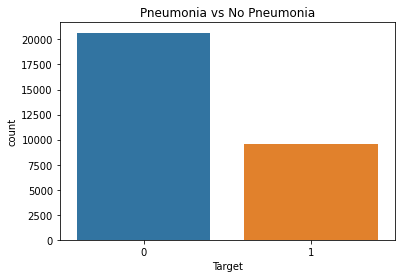

In [9]:
sns.countplot(x="Target", data=labels)
plt.title("Pneumonia vs No Pneumonia")

In [10]:
labels['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

In [11]:
print("The number of patients having pneumonia is:",labels['Target'].value_counts()[1])
print("The number of patients not having pneumonia is:",labels['Target'].value_counts()[0])

The number of patients having pneumonia is: 9555
The number of patients not having pneumonia is: 20672


(-0.5, 1023.5, 1023.5, -0.5)

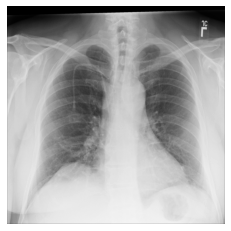

In [12]:
import matplotlib.pyplot as plt

patientId = labels['patientId'][13]
dcm_file = 'C:/Users/ashwathi.subramanian/Downloads/stage_2_train_images/' +  patientId + '.dcm'
dcm_data = pydicom.read_file(dcm_file)
#     print(dcm_data)
im = dcm_data.pixel_array
#     print(type(im))
#     print(im.dtype)
#     print(im.shape)
pylab.imshow(im, cmap=pylab.cm.gist_gray)
pylab.axis('off')

In [13]:
## Extract the bounding box information, corresponding to a patient label
def return_bounding_box_coords(patient_id):
    if patient_id in labels['patientId'].to_list():
        nrows = len(labels[labels['patientId']==patient_id])
        coords = []
        op_dict = {}
        for i in range(nrows):
            patientID = patient_id
            l = []
            l.append(labels[labels['patientId']==patient_id]['x'].values[i])
            l.append(labels[labels['patientId']==patient_id]['y'].values[i])
            l.append(labels[labels['patientId']==patient_id]['width'].values[i])
            l.append(labels[labels['patientId']==patient_id]['height'].values[i])
            coords.append(l)
            target = labels[labels['patientId']==patient_id]['Target'].values[0]
        op_dict["Lungs affected"] = nrows
        op_dict["patientID"] = patientID
        op_dict["coords"] = coords
        op_dict["target"] = target
        return op_dict
    return "Patient:" + patient_id + "Does not exist"

In [14]:
return_bounding_box_coords('00436515-870c-4b36-a041-de91049b9ab4')

{'Lungs affected': 2,
 'patientID': '00436515-870c-4b36-a041-de91049b9ab4',
 'coords': [[264.0, 152.0, 213.0, 379.0], [562.0, 152.0, 256.0, 453.0]],
 'target': 1}

In [15]:
return_bounding_box_coords('00313ee0-9eaa-42f4-b0ab-c148ed3241cd')

{'Lungs affected': 1,
 'patientID': '00313ee0-9eaa-42f4-b0ab-c148ed3241cd',
 'coords': [[nan, nan, nan, nan]],
 'target': 0}

In [16]:
return_bounding_box_coords('00313ee0-9eaa-42f4-b0ab-c148ed3241cdsd')

'Patient:00313ee0-9eaa-42f4-b0ab-c148ed3241cdsdDoes not exist'

In [17]:
def draw(data):
    """
    Method to draw single patient with bounding box(es) if present 

    """
    # --- Open DICOM file
    d = pydicom.read_file('C:/Users/ashwathi.subramanian/Downloads/stage_2_train_images/' +  data["patientID"] + '.dcm')
    im = d.pixel_array

    # --- Convert from single-channel grayscale to 3-channel RGB
    im = np.stack([im] * 3, axis=2)

    # --- Add boxes with random color if present
    for box in data["coords"]:
        if np.nan not in box:
            rgb = np.floor(np.random.rand(3) * 256).astype('int')
            im = overlay_box(im=im, box=box, rgb=rgb, stroke=6)

    pylab.imshow(im, cmap=pylab.cm.gist_gray)
    pylab.axis('off')

def overlay_box(im, box, rgb, stroke=1):
    """
    Method to overlay single box on image

    """
    # --- Convert coordinates to integers
    box = [int(b) for b in box if b != np.nan]
    
    # --- Extract coordinates
    x1, y1, width, height = box
    if (x1 != np.nan and y1 != np.nan and width != np.nan and height != np.nan):
        
        y2 = y1 + height
        x2 = x1 + width

        im[y1:y1 + stroke, x1:x2] = rgb
        im[y2:y2 + stroke, x1:x2] = rgb
        im[y1:y2, x1:x1 + stroke] = rgb
        im[y1:y2, x2:x2 + stroke] = rgb

    return im

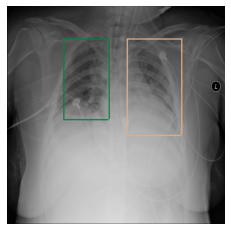

In [18]:
draw(return_bounding_box_coords('00436515-870c-4b36-a041-de91049b9ab4'))